In [74]:
# imports
from datetime import datetime
start_time = datetime.now()
import numpy as np
import pandas as pd
from google.colab import files
import os
from google.colab import drive
drive.mount('/content/drive')
# Assuming 'data_path' is correctly defined as:
data_path = '/content/drive/My Drive/Spring 2024 - MSBA/DSO-574 -- Big Data/574 Assignments/Basketball Assignment/Data/'
os.chdir(data_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
## data read

import pandas as pd

basketball_data_2017_2018 = pd.read_csv(data_path + '2017-2018 NBA Play-By-Play Data.csv')
basketball_data_2018_2019 = pd.read_csv(data_path + '2018-2019 NBA Play-By-Play Data.csv')
basketball_data_2019_2020 = pd.read_csv(data_path + '2019-2020 NBA Play-By-Play Data.csv')


nba_combined = pd.concat([basketball_data_2017_2018,basketball_data_2018_2019,basketball_data_2019_2020], axis = 0)


<ipython-input-75-71d55de23d39>:5: DtypeWarning: Columns (39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  basketball_data_2017_2018 = pd.read_csv(data_path + '2017-2018 NBA Play-By-Play Data.csv')
<ipython-input-75-71d55de23d39>:6: DtypeWarning: Columns (40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  basketball_data_2018_2019 = pd.read_csv(data_path + '2018-2019 NBA Play-By-Play Data.csv')
<ipython-input-75-71d55de23d39>:7: DtypeWarning: Columns (40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  basketball_data_2019_2020 = pd.read_csv(data_path + '2019-2020 NBA Play-By-Play Data.csv')


In [76]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

nba_combined.head(1000)

Output hidden; open in https://colab.research.google.com to view.

In [77]:
columns = nba_combined.columns.to_list()
columns

['Unnamed: 0',
 'game_id',
 'data_set',
 'date',
 'a1',
 'a2',
 'a3',
 'a4',
 'a5',
 'h1',
 'h2',
 'h3',
 'h4',
 'h5',
 'period',
 'away_score',
 'home_score',
 'remaining_time',
 'elapsed',
 'play_length',
 'play_id',
 'team',
 'event_type',
 'assist',
 'away',
 'home',
 'block',
 'entered',
 'left',
 'num',
 'opponent',
 'outof',
 'player',
 'points',
 'possession',
 'reason',
 'result',
 'steal',
 'type',
 'shot_distance',
 'original_x',
 'original_y',
 'converted_x',
 'converted_y',
 'description',
 'GameFile',
 'Unnamed: 44',
 'Unnamed: 45']

In [78]:
nba_combined['team'].unique()

array([nan, 'CHI', 'DET', 'IND', 'OKC', 'LAL', 'MIN', 'POR', 'WAS', 'MIA',
       'NOP', 'MEM', 'PHI', 'TOR', 'NYK', 'CHA', 'SAS', 'LAC', 'BOS',
       'PHX', 'MIL', 'ATL', 'CLE', 'BKN', 'UTA', 'DAL', 'ORL', 'SAC',
       'DEN', 'HOU', 'GSW'], dtype=object)

In [79]:
nulls_count = nba_combined.isnull().sum()

total_rows = nba_combined.shape[0]

null_percentage = (nulls_count/total_rows) * 100
null_percentage

Unnamed: 0          0.000000
game_id             0.000000
data_set            0.000000
date                0.000000
a1                  0.000000
a2                  0.000000
a3                  0.000000
a4                  0.000000
a5                  0.002664
h1                  0.000510
h2                  0.000000
h3                  0.000000
h4                  0.000000
h5                  0.004195
period              0.000000
away_score          0.000000
home_score          0.000000
remaining_time      0.000000
elapsed             0.000000
play_length         0.000000
play_id             0.000000
team                7.546190
event_type          0.057254
assist             89.768144
away               99.636919
home               99.634992
block              97.915558
entered            90.018985
left               90.018871
num                90.358144
opponent           91.204766
outof              90.358144
player              8.246616
points             52.810689
possession    

## Duo Selection

i decided to look at **Stephen Curry and Klay Thompson** 'power partnership' because i think that Steph's 3-point shooting is insane, and Klay is one of the best to create space for Steph, strech the defences to the max and create scoring opportunities for themselves and their teammates.
- well and another reason why i choose them bc they've been incredibly successgul in 2017, 2018, and pretty successful in 2019 as well
- plus their played together for all 3 of the seasons that we have data for

In [80]:
# groupedby_data = nba_combined.groupby(['data_set', 'game_id', 'team'])
# points_sum_per_game = groupedby_data['points'].sum()
# points_sum_per_game_df = pd.DataFrame(points_sum_per_game)
# points_sum_per_game_df

In [81]:
nba_combined['data_set'].unique()

array(['2017-2018 Regular Season', '2018 Playoff',
       '2017-18 Regular Season', '2018-2019 Regular Season',
       '2019 Playoff', '2018-19 Regular Season',
       '2019-2020 Regular Season', '2019-20 Playoffs',
       '2019-20 Regular Season'], dtype=object)

# Data Concerns

For some reason there is some inconsistency with the names for the seasons. Therefore, I will perfrom some simple [appeared to be not that simple lmao] data cleaning bellow

In [82]:
nba_combined.groupby('data_set')['game_id'].nunique()

data_set
2017-18 Regular Season         2
2017-2018 Regular Season    1228
2018 Playoff                  82
2018-19 Regular Season         1
2018-2019 Regular Season    1229
2019 Playoff                  82
2019-20 Playoffs              83
2019-20 Regular Season       407
2019-2020 Regular Season     653
Name: game_id, dtype: int64

Had to address the issues displayed above ^^^

In [83]:
### Solution after a super long analysis and game comparison for each playoff season

nba_combined['data_set'] = nba_combined['data_set'].replace({
    '2017-18 Regular Season': '2017-2018 Regular Season',
    '2018-19 Regular Season': '2018-2019 Regular Season',
    '2019-20 Regular Season': '2019-2020 Regular Season',
    '2019-20 Playoffs': '2020 Playoff'
})

games_per_season = nba_combined.groupby('data_set')['game_id'].nunique()
games_per_season

data_set
2017-2018 Regular Season    1230
2018 Playoff                  82
2018-2019 Regular Season    1230
2019 Playoff                  82
2019-2020 Regular Season    1060
2020 Playoff                  83
Name: game_id, dtype: int64

Too many games observed?

- Actually, not too many. The count of 1230 games for both the **2017-2018 and 2018-2019** regular seasons aligns with the expected number of games in an NBA season before the 2020-21 season adjustments. Each of the 30 teams plays 82 games (41 home and 41 away), resulting in 1230 games in total. _These counts indicate complete data for these seasons._

-


In [84]:
### Checking Duplicates - Here I was trying to find the difference between these two Playoff seasons that are named in a weird way



playoff_2019 = nba_combined[nba_combined['data_set'] == '2019 Playoff']
playoff_2019_20 = nba_combined[nba_combined['data_set'] == '2020 Playoff']

common_games = pd.merge(playoff_2019, playoff_2019_20, on='game_id', how='inner')

if not common_games.empty:
    print(f"Found {common_games['game_id'].nunique()} common game IDs between '2019 Playoff' and '2019-20 Playoffs'.")
    # Optionally, print the common game IDs to inspect them
    print("Common game IDs:", common_games['game_id'].unique())
else:
    print("No common game IDs found between '2019 Playoff' and '2019-20 Playoffs'.")

No common game IDs found between '2019 Playoff' and '2019-20 Playoffs'.


### Takeaways So Far


- Based on the analysis above, I def conclude that `2019-20 Playoffs` is supposed to be 2020 Playoffs. Now, I will compare the teams that participated in finals to make sure im correct.

In [85]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

playoff_2019 = nba_combined[nba_combined['data_set'] == '2019 Playoff']
playoff_2020 = nba_combined[nba_combined['data_set'] == '2020 Playoff']
playoff_2018 = nba_combined[nba_combined['data_set'] == '2018 Playoff']


#comparing each season to make sure the seasons are actually correct
final_game_2018 = playoff_2018[((playoff_2018['team'] == 'GSW') | (playoff_2018['team'] == 'GSW')) &
                               ((playoff_2018['away_score'] == 108) & (playoff_2018['home_score'] == 85)) |
                               ((playoff_2018['away_score'] == 85) & (playoff_2018['home_score'] == 108))]



final_game_2019 = playoff_2019[((playoff_2019['team'] == 'TOR') | (playoff_2019['team'] == 'TOR')) &
                               ((playoff_2019['away_score'] == 114) & (playoff_2019['home_score'] == 110)) |
                               ((playoff_2019['away_score'] == 110) & (playoff_2019['home_score'] == 114))]

final_game_2020 = playoff_2020[((playoff_2020['team'] == 'LAL') | (playoff_2020['team'] == 'LAL')) &
                               ((playoff_2020['away_score'] == 106) & (playoff_2020['home_score'] == 93)) |
                               ((playoff_2020['away_score'] == 93) & (playoff_2020['home_score'] == 106))]


print(final_game_2018[['date', 'team', 'away_score', 'home_score', 'GameFile']])
print(final_game_2019[['date', 'team', 'away_score', 'home_score', 'GameFile']])
print(final_game_2020[['date', 'team', 'away_score', 'home_score', 'GameFile']])



              date team  away_score  home_score  \
62990   2018-05-06  GSW         108          85   
62994   2018-05-06  GSW         108          85   
62995   2018-05-06  GSW         108          85   
62996   2018-05-06  GSW         108          85   
62997   2018-05-06  GSW         108          85   
63000   2018-05-06  GSW         108          85   
221318  2018-06-08  GSW         108          85   
221322  2018-06-08  GSW         108          85   

                                   GameFile  
62990   [2018-05-06]-0041700234-GSW@NOP.csv  
62994   [2018-05-06]-0041700234-GSW@NOP.csv  
62995   [2018-05-06]-0041700234-GSW@NOP.csv  
62996   [2018-05-06]-0041700234-GSW@NOP.csv  
62997   [2018-05-06]-0041700234-GSW@NOP.csv  
63000   [2018-05-06]-0041700234-GSW@NOP.csv  
221318  [2018-06-08]-0041700404-GSW@CLE.csv  
221322  [2018-06-08]-0041700404-GSW@CLE.csv  
              date team  away_score  home_score  \
336619  2019-05-19  TOR         110         114   
336620  2019-05-19  NaN 

### Now that the ds is sorted in a better way, I can start loooking and my 'partnership' and derive insights.

In [86]:
nba_combined['data_set'].unique()

array(['2017-2018 Regular Season', '2018 Playoff',
       '2018-2019 Regular Season', '2019 Playoff',
       '2019-2020 Regular Season', '2020 Playoff'], dtype=object)

# Updates (feature engeeneting to the main dataset (combined))

- after doing a whole bunch of analysis i have to come back to the very beggining to perform some feature engeneering to simplify the process and make sure that the data is consistent thoughout the whole analysis

- as of now, march 5th; 3am, i will add the following feautures:
  - winners/losers
  - clutch time feature
    - clutch time need to have total_seconds_remaining feature which i will add as well
  - is_three_pointer
  - score difference (for clutch time analysis)

In [87]:
nba_combined.shape

(1764069, 48)

In [88]:
# adding TOTAL SECONDS to the main ds

def convert_to_seconds(time_str):
    # Split the time string by ':'
    parts = time_str.split(':')
    # Ensure there are at least two parts (minutes and seconds)
    if len(parts) >= 2:
        minutes, seconds = parts[-2], parts[-1]  # Only take the last two parts to ignore any extra segments
        return int(minutes) * 60 + int(seconds)
    else:
        # Handle unexpected format by returning 0 or an appropriate default value
        return 0

nba_combined['total_seconds_remaining'] = nba_combined['remaining_time'].apply(convert_to_seconds)

In [89]:
#SCORE DIFFERENCE

nba_combined['score_difference'] = (nba_combined['home_score'] - nba_combined['away_score']).abs()

In [90]:
#CLUTCH TIME

nba_combined['is_clutch'] = ((nba_combined['period'] == 4) & (nba_combined['total_seconds_remaining'] <= 300) & (nba_combined['score_difference'] <= 5)) \
| ((nba_combined['period'] > 4) & (nba_combined['total_seconds_remaining'] <= 300) & (nba_combined['score_difference'] <= 5)) #over time clutch time included

#### Why This Definition Makes Sense
- The final 5 minutes of a closely contested game are critical. Teams and players are under increased pressure to perform, making these moments especially interesting for performance analysis.

- A score difference of 5 points or less means the game is competitive, and any single play can significantly impact the game's outcome.
Including Overtime: Overtime periods are inherently high-stakes, so applying the same criteria to these periods is logical for identifying clutch moments.


In [91]:
#THREE & TWO POINTERS

nba_combined['is_three_pointer'] = nba_combined['points'] == 3.0
nba_combined['is_two_pointer'] = nba_combined['points'] == 2.0

#makes it easier to count for each player

nba_combined[['points', 'is_three_pointer', 'is_two_pointer']].head(10)

,points,is_three_pointer,is_two_pointer
0,NaN,False,False
1,NaN,False,False
2,2.0,False,True
3,NaN,False,False
4,0.0,False,False
5,NaN,False,False
6,0.0,False,False
7,NaN,False,False
8,3.0,True,False
9,2.0,False,True


In [92]:
#THREE_POINT ATTEMPTS

nba_combined = nba_combined.copy()

nba_combined['shot_distance'] = pd.to_numeric(nba_combined['shot_distance'], errors='coerce')

def is_three_point_attempt(shot_distance):
    # Considering any shot equal to or beyond 22 feet as a 3PT attempt
    # Adjust the threshold if you want to be more precise with the corner and arc distinction
    return shot_distance >= 22

# Apply the function to the 'shot_distance' column to create the '3PT_Attempts' feature
nba_combined['3PT_Attempts'] = nba_combined['shot_distance'].apply(is_three_point_attempt)



In [93]:
#WINNER/LOSER


In [94]:
#regular seasons
regular_season_2017_2018 = nba_combined[nba_combined['data_set'] =='2017-2018 Regular Season']
regular_season_2018_2019 = nba_combined[nba_combined['data_set'] == '2018-2019 Regular Season']
regular_season_2019_2020 = nba_combined[nba_combined['data_set'] == '2019-2020 Regular Season']

#playoffs
playoff_2018 = nba_combined[nba_combined['data_set'] == '2018 Playoff']
playoff_2019 = nba_combined[nba_combined['data_set'] == '2019 Playoff']
playoff_2020 = nba_combined[nba_combined['data_set'] == '2020 Playoff']


In [95]:
# regular_season_2017_2018_head_1000 = regular_season_2017_2018.head(100000)

# regular_season_2017_2018_head_1000.to_csv('my_dataframe.csv', index=False)

In [96]:
# from google.colab import files
# files.download('my_dataframe.csv')


Potencial Game Plans to analyze. Stephen Curry and Klay:

**Shooting Efficiency and Volume**

- one of the metrics that i think it's worth looking at is eFG%:
  - here's the description: Effective Field Goal Percentage (eFG%) is a statistic used in basketball to measure a player's or team's shooting efficiency while accounting for the extra value of three-point shots. It essentially rewards players for making three-pointers, which are worth more points than regular two-point field goals.

- math behind it: eFG% = (Field Goals Made + 0.5 * Three-Pointers Made) / Field Goal Attempts


how to structure:

on the same slide:
- Individual player eFG% (solo vs. when playing together)
- Team eFG% (stars together vs. stars staggered)

key takeaways im trying to find(hypothesis):

- Player X's individual eFG% increases/decreases significantly when playing alongside Player Y."
- "The team's overall eFG% is at its highest when both stars are on the court"

In [97]:
regular_season_2017_2018['event_type'].unique()

array(['start of period', 'jump ball', 'shot', 'turnover', 'miss',
       'rebound', 'timeout', 'foul', 'free throw', 'sub', 'end of period',
       'violation', 'unknown', 'ejection', nan], dtype=object)

# March 9th, 2024

In [98]:

## separate the df on games with them and without them

In [99]:
gsw_games = regular_season_2017_2018[regular_season_2017_2018['team'] == 'GSW']
player_columns = ['a1', 'a2', 'a3', 'a4', 'a5', 'h1', 'h2', 'h3', 'h4', 'h5']

In [100]:
gsw_games['game_id'].nunique()

82

In [101]:
curry_game_ids = gsw_games[gsw_games['player'] == 'Stephen Curry']['game_id'].unique() #games where Curry participated
thompson_game_ids = gsw_games[gsw_games['player'] == 'Klay Thompson']['game_id'].unique() # games where Thomson participated
both_played_game_ids = set(curry_game_ids).intersection(set(thompson_game_ids)) #games where they both played

games_with_both = gsw_games[gsw_games['game_id'].isin(both_played_game_ids)]
games_without_both = gsw_games[~gsw_games['game_id'].isin(both_played_game_ids)]


games_with_both_count = len(games_with_both['game_id'].unique()) # Counting the unique games in each split for verification
games_without_both_count = len(games_without_both['game_id'].unique())

total_gsw_games_count = len(gsw_games['game_id'].unique()) # Total GSW games count for comparisonn

games_with_both_count, games_without_both_count, total_gsw_games_count

###################################################################################################################################################
#finally, separated the ds with both and without both of them on the field

(50, 32, 82)

In [102]:
######### 2017 - 2018 ###############


# Filter to get all three-point attempts by the team when both players participated
threes_attempted_with_both = games_with_both[games_with_both['3PT_Attempts'] == True]
threes_made_with_both = threes_attempted_with_both[threes_attempted_with_both['result'] == 'made'].shape[0]
threes_attempted_with_both_count = threes_attempted_with_both.shape[0]
team_3p_pct_with_both = threes_made_with_both / threes_attempted_with_both_count if threes_attempted_with_both_count > 0 else 0

# Filter to get all three-point attempts by the team without both players
threes_attempted_without_both = games_without_both[games_without_both['3PT_Attempts'] == True]
threes_made_without_both = threes_attempted_without_both[threes_attempted_without_both['result'] == 'made'].shape[0]
threes_attempted_without_both_count = threes_attempted_without_both.shape[0]
team_3p_pct_without_both = threes_made_without_both / threes_attempted_without_both_count if threes_attempted_without_both_count > 0 else 0

team_3p_pct_with_both, team_3p_pct_without_both


(0.4103041589075109, 0.3563892145369285)

In [103]:
#^^^^^^^^^ results for 2017-2018 ^^^^^^^^^^^^^

In [104]:
gsw_games = regular_season_2018_2019[regular_season_2018_2019['team'] == 'GSW']

curry_game_ids = gsw_games[gsw_games['player'] == 'Stephen Curry']['game_id'].unique() #games where Curry participated
thompson_game_ids = gsw_games[gsw_games['player'] == 'Klay Thompson']['game_id'].unique() # games where Thomson participated
both_played_game_ids = set(curry_game_ids).intersection(set(thompson_game_ids)) #games where they both played

games_with_both = gsw_games[gsw_games['game_id'].isin(both_played_game_ids)]
games_without_both = gsw_games[~gsw_games['game_id'].isin(both_played_game_ids)]


games_with_both_count = len(games_with_both['game_id'].unique()) # Counting the unique games in each split for verification
games_without_both_count = len(games_without_both['game_id'].unique())

total_gsw_games_count = len(gsw_games['game_id'].unique()) # Total GSW games count for comparisonn

games_with_both_count, games_without_both_count, total_gsw_games_count

###################################################################################################################################################
#finally, separated the ds with both and without both of them on the field

######### 2018 - 2019 ###############


# Filter to get all three-point attempts by the team when both players participated
threes_attempted_with_both = games_with_both[games_with_both['3PT_Attempts'] == True]
threes_made_with_both = threes_attempted_with_both[threes_attempted_with_both['result'] == 'made'].shape[0]
threes_attempted_with_both_count = threes_attempted_with_both.shape[0]
team_3p_pct_with_both = threes_made_with_both / threes_attempted_with_both_count if threes_attempted_with_both_count > 0 else 0

# Filter to get all three-point attempts by the team without both players
threes_attempted_without_both = games_without_both[games_without_both['3PT_Attempts'] == True]
threes_made_without_both = threes_attempted_without_both[threes_attempted_without_both['result'] == 'made'].shape[0]
threes_attempted_without_both_count = threes_attempted_without_both.shape[0]
team_3p_pct_without_both = threes_made_without_both / threes_attempted_without_both_count if threes_attempted_without_both_count > 0 else 0

team_3p_pct_with_both, team_3p_pct_without_both


(0.3941176470588235, 0.33969465648854963)

In [105]:
#^^^^^^^^^ results for 2018-2019 ^^^^^^^^^^^^^

In [106]:
gsw_games = playoff_2018[playoff_2018['team'] == 'GSW']

curry_game_ids = gsw_games[gsw_games['player'] == 'Stephen Curry']['game_id'].unique() #games where Curry participated
thompson_game_ids = gsw_games[gsw_games['player'] == 'Klay Thompson']['game_id'].unique() # games where Thomson participated
both_played_game_ids = set(curry_game_ids).intersection(set(thompson_game_ids)) #games where they both played

games_with_both = gsw_games[gsw_games['game_id'].isin(both_played_game_ids)]
games_without_both = gsw_games[~gsw_games['game_id'].isin(both_played_game_ids)]


games_with_both_count = len(games_with_both['game_id'].unique()) # Counting the unique games in each split for verification
games_without_both_count = len(games_without_both['game_id'].unique())

total_gsw_games_count = len(gsw_games['game_id'].unique()) # Total GSW games count for comparisonn

games_with_both_count, games_without_both_count, total_gsw_games_count

###################################################################################################################################################
#finally, separated the ds with both and without both of them on the field




# Filter to get all three-point attempts by the team when both players participated
threes_attempted_with_both = games_with_both[games_with_both['3PT_Attempts'] == True]
threes_made_with_both = threes_attempted_with_both[threes_attempted_with_both['result'] == 'made'].shape[0]
threes_attempted_with_both_count = threes_attempted_with_both.shape[0]
team_3p_pct_with_both = threes_made_with_both / threes_attempted_with_both_count if threes_attempted_with_both_count > 0 else 0

# Filter to get all three-point attempts by the team without both players
threes_attempted_without_both = games_without_both[games_without_both['3PT_Attempts'] == True]
threes_made_without_both = threes_attempted_without_both[threes_attempted_without_both['result'] == 'made'].shape[0]
threes_attempted_without_both_count = threes_attempted_without_both.shape[0]
team_3p_pct_without_both = threes_made_without_both / threes_attempted_without_both_count if threes_attempted_without_both_count > 0 else 0

team_3p_pct_with_both, team_3p_pct_without_both


(0.362, 0.3485714285714286)

In [107]:
#^^^^^^^^^ results for PLAYOOFS 2018^^^^^^^^^^^^^

In [108]:
gsw_games = playoff_2019[playoff_2019['team'] == 'GSW']

curry_game_ids = gsw_games[gsw_games['player'] == 'Stephen Curry']['game_id'].unique() #games where Curry participated
thompson_game_ids = gsw_games[gsw_games['player'] == 'Klay Thompson']['game_id'].unique() # games where Thomson participated
both_played_game_ids = set(curry_game_ids).intersection(set(thompson_game_ids)) #games where they both played

games_with_both = gsw_games[gsw_games['game_id'].isin(both_played_game_ids)]
games_without_both = gsw_games[~gsw_games['game_id'].isin(both_played_game_ids)]


games_with_both_count = len(games_with_both['game_id'].unique()) # Counting the unique games in each split for verification
games_without_both_count = len(games_without_both['game_id'].unique())

total_gsw_games_count = len(gsw_games['game_id'].unique()) # Total GSW games count for comparisonn

games_with_both_count, games_without_both_count, total_gsw_games_count

###################################################################################################################################################
#finally, separated the ds with both and without both of them on the field




# Filter to get all three-point attempts by the team when both players participated
threes_attempted_with_both = games_with_both[games_with_both['3PT_Attempts'] == True]
threes_made_with_both = threes_attempted_with_both[threes_attempted_with_both['result'] == 'made'].shape[0]
threes_attempted_with_both_count = threes_attempted_with_both.shape[0]
team_3p_pct_with_both = threes_made_with_both / threes_attempted_with_both_count if threes_attempted_with_both_count > 0 else 0

# Filter to get all three-point attempts by the team without both players
threes_attempted_without_both = games_without_both[games_without_both['3PT_Attempts'] == True]
threes_made_without_both = threes_attempted_without_both[threes_attempted_without_both['result'] == 'made'].shape[0]
threes_attempted_without_both_count = threes_attempted_without_both.shape[0]
team_3p_pct_without_both = threes_made_without_both / threes_attempted_without_both_count if threes_attempted_without_both_count > 0 else 0

team_3p_pct_with_both, team_3p_pct_without_both


(0.37163120567375885, 0.35135135135135137)

In [109]:
#^^^^^^^^^ results for PLAYOOFS 2019^^^^^^^^^^^^^

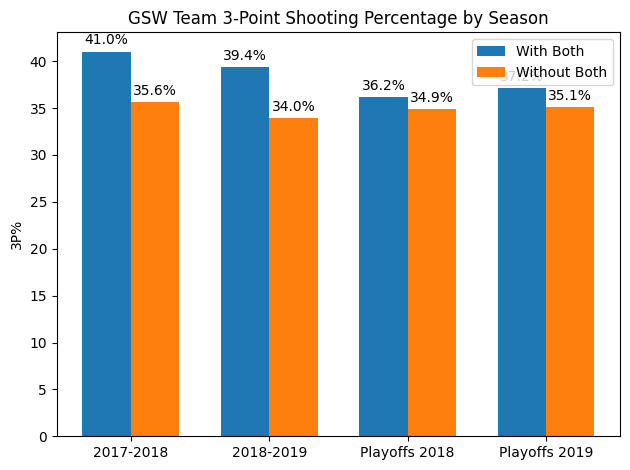

In [110]:
import matplotlib.pyplot as plt

# Data preparation
seasons = ['2017-2018', '2018-2019', 'Playoffs 2018', 'Playoffs 2019']
team_3p_pct_with_both = [0.4103041589075109, 0.3941176470588235, 0.362, 0.37163120567375885]
team_3p_pct_without_both = [0.3563892145369285, 0.33969465648854963, 0.3485714285714286, 0.35135135135135137]

# Converting to percentages
team_3p_pct_with_both = [x * 100 for x in team_3p_pct_with_both]
team_3p_pct_without_both = [x * 100 for x in team_3p_pct_without_both]

# Setting up the bar chart
# Converting the range to a numpy array for element-wise operations
x = np.arange(len(seasons))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, team_3p_pct_with_both, width, label='With Both')
rects2 = ax.bar(x + width/2, team_3p_pct_without_both, width, label='Without Both')

ax.set_ylabel('3P%')
ax.set_title('GSW Team 3-Point Shooting Percentage by Season')
ax.set_xticks(x)
ax.set_xticklabels(seasons)
ax.legend()

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


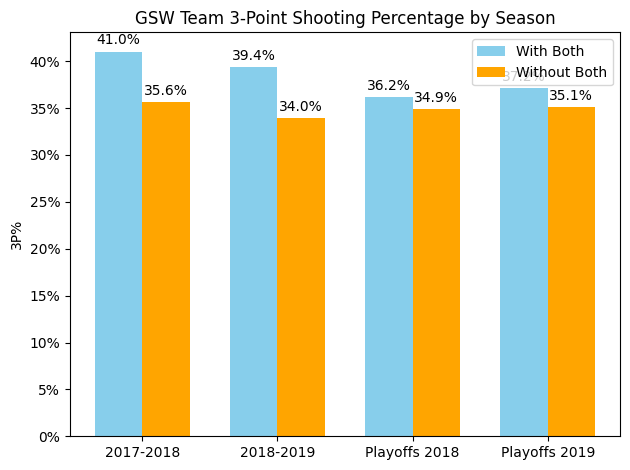

In [111]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Data preparation
seasons = ['2017-2018', '2018-2019', 'Playoffs 2018', 'Playoffs 2019']
team_3p_pct_with_both = [41.03, 39.41, 36.2, 37.16]  # Already converted to percentages
team_3p_pct_without_both = [35.64, 33.97, 34.86, 35.14]  # Already converted to percentages

# Setting up the bar chart
x = np.arange(len(seasons))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, team_3p_pct_with_both, width, label='With Both', color='skyblue')
rects2 = ax.bar(x + width/2, team_3p_pct_without_both, width, label='Without Both', color='orange')

# Formatting the y-axis labels as percentages
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))

# Adding some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('3P%')
ax.set_title('GSW Team 3-Point Shooting Percentage by Season')
ax.set_xticks(x)
ax.set_xticklabels(seasons)
ax.legend()

# Function to attach a text label above each bar, displaying its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


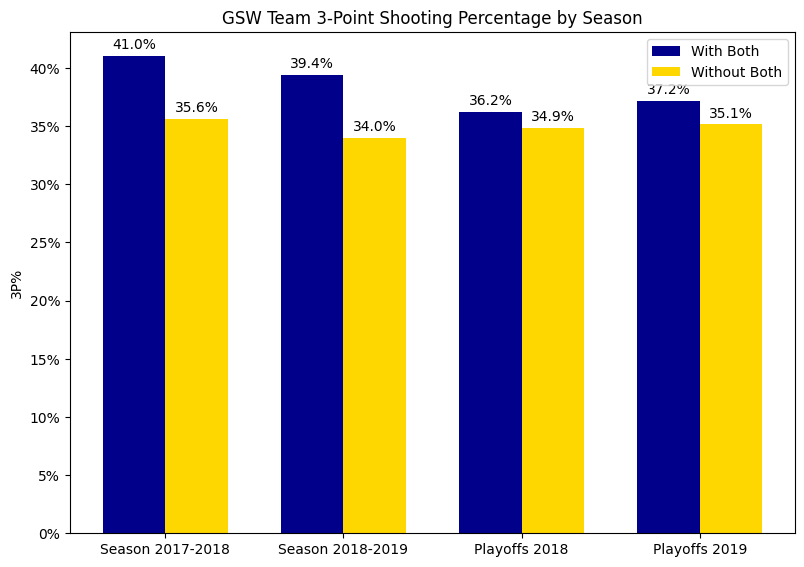

In [112]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
# Data preparation
seasons = ['Season 2017-2018', 'Season 2018-2019', 'Playoffs 2018', 'Playoffs 2019']
team_3p_pct_with_both = [41.03, 39.41, 36.2, 37.16]  # Already converted to percentages
team_3p_pct_without_both = [35.64, 33.97, 34.86, 35.14]  # Already converted to percentages

# Setting up the bar chart
x = np.arange(len(seasons))  # the label locations
width = 0.35  # the width of the bars

# Enlarging the figure size to better fit the legend
fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure size
rects1 = ax.bar(x - width/2, team_3p_pct_with_both, width, label='With Both', color='darkblue')
rects2 = ax.bar(x + width/2, team_3p_pct_without_both, width, label='Without Both', color='gold')

# Formatting the y-axis labels as percentages
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))

# Adding some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('3P%')
ax.set_title('GSW Team 3-Point Shooting Percentage by Season')
ax.set_xticks(x)
ax.set_xticklabels(seasons)
ax.legend()

# Function to attach a text label above each bar, displaying its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',  # Update annotation format
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Adjust the layout to prevent the legend from overlapping the bars
fig.tight_layout()
plt.subplots_adjust(top=0.9, right=0.8)  # Adjust spacing to accommodate title and legend

plt.show()


# March 10th: Last grind

In [113]:
### 2017-2018


gsw_games = regular_season_2017_2018[regular_season_2017_2018['team'] == 'GSW']

curry_game_ids = gsw_games[gsw_games['player'] == 'Stephen Curry']['game_id'].unique() #games where Curry participated
thompson_game_ids = gsw_games[gsw_games['player'] == 'Klay Thompson']['game_id'].unique() # games where Thomson participated
both_played_game_ids = set(curry_game_ids).intersection(set(thompson_game_ids)) #games where they both played

games_with_both = gsw_games[gsw_games['game_id'].isin(both_played_game_ids)]
games_without_both = gsw_games[~gsw_games['game_id'].isin(both_played_game_ids)]


games_with_both_count = len(games_with_both['game_id'].unique()) # Counting the unique games in each split for verification
games_without_both_count = len(games_without_both['game_id'].unique())

total_gsw_games_count = len(gsw_games['game_id'].unique()) # Total GSW games count for comparisonn

games_with_both_count, games_without_both_count, total_gsw_games_count


#--------------------------------------------------------------------------------------------------------------------------------

(50, 32, 82)

In [114]:
clutch_plays = gsw_games[gsw_games['is_clutch'] == True]

clutch_with_both = clutch_plays[clutch_plays['game_id'].isin(both_played_game_ids)]
clutch_without_both = clutch_plays[~clutch_plays['game_id'].isin(both_played_game_ids)]

# Define a function to calculate eFG%
def calculate_efg(dataset):
    field_goals_made = dataset[dataset['result'] == 'made'].shape[0]
    field_goals_attempted = dataset.shape[0]
    three_point_field_goals_made = dataset[(dataset['result'] == 'made') & (dataset['is_three_pointer'])].shape[0]
    efg = (field_goals_made + 0.5 * three_point_field_goals_made) / field_goals_attempted if field_goals_attempted > 0 else 0
    return efg

# Calculate eFG% for GSW during clutch time with and without both players
efg_with_both = calculate_efg(clutch_with_both)
efg_without_both = calculate_efg(clutch_without_both)

efg_with_both, efg_without_both

(0.3226837060702875, 0.2345360824742268)

In [115]:
#^^^^^^ CLUTCH TIME eFG% - 2017-2018

In [116]:
gsw_games = regular_season_2018_2019[regular_season_2018_2019['team'] == 'GSW'] # CHANGE HERE 2018_2019

curry_game_ids = gsw_games[gsw_games['player'] == 'Stephen Curry']['game_id'].unique() #games where Curry participated
thompson_game_ids = gsw_games[gsw_games['player'] == 'Klay Thompson']['game_id'].unique() # games where Thomson participated
both_played_game_ids = set(curry_game_ids).intersection(set(thompson_game_ids)) #games where they both played

games_with_both = gsw_games[gsw_games['game_id'].isin(both_played_game_ids)]
games_without_both = gsw_games[~gsw_games['game_id'].isin(both_played_game_ids)]

clutch_plays = gsw_games[gsw_games['is_clutch'] == True]

clutch_with_both = clutch_plays[clutch_plays['game_id'].isin(both_played_game_ids)]
clutch_without_both = clutch_plays[~clutch_plays['game_id'].isin(both_played_game_ids)]

# Define a function to calculate eFG%
def calculate_efg(dataset):
    field_goals_made = dataset[dataset['result'] == 'made'].shape[0]
    field_goals_attempted = dataset.shape[0]
    three_point_field_goals_made = dataset[(dataset['result'] == 'made') & (dataset['is_three_pointer'])].shape[0]
    efg = (field_goals_made + 0.5 * three_point_field_goals_made) / field_goals_attempted if field_goals_attempted > 0 else 0
    return efg

# Calculate eFG% for GSW during clutch time with and without both players
efg_with_both = calculate_efg(clutch_with_both)
efg_without_both = calculate_efg(clutch_without_both)

efg_with_both, efg_without_both

(0.34334763948497854, 0.25510204081632654)

In [117]:
gsw_games = playoff_2018[playoff_2018['team'] == 'GSW'] # CHANGE HERE - playoffs 2018

curry_game_ids = gsw_games[gsw_games['player'] == 'Stephen Curry']['game_id'].unique() #games where Curry participated
thompson_game_ids = gsw_games[gsw_games['player'] == 'Klay Thompson']['game_id'].unique() # games where Thomson participated
both_played_game_ids = set(curry_game_ids).intersection(set(thompson_game_ids)) #games where they both played

games_with_both = gsw_games[gsw_games['game_id'].isin(both_played_game_ids)]
games_without_both = gsw_games[~gsw_games['game_id'].isin(both_played_game_ids)]

clutch_plays = gsw_games[gsw_games['is_clutch'] == True]

clutch_with_both = clutch_plays[clutch_plays['game_id'].isin(both_played_game_ids)]
clutch_without_both = clutch_plays[~clutch_plays['game_id'].isin(both_played_game_ids)]

# Define a function to calculate eFG%
def calculate_efg(dataset):
    field_goals_made = dataset[dataset['result'] == 'made'].shape[0]
    field_goals_attempted = dataset.shape[0]
    three_point_field_goals_made = dataset[(dataset['result'] == 'made') & (dataset['is_three_pointer'])].shape[0]
    efg = (field_goals_made + 0.5 * three_point_field_goals_made) / field_goals_attempted if field_goals_attempted > 0 else 0
    return efg

# Calculate eFG% for GSW during clutch time with and without both players
efg_with_both = calculate_efg(clutch_with_both)
efg_without_both = calculate_efg(clutch_without_both)

efg_with_both, efg_without_both

(0.3310810810810811, 0.2727272727272727)

In [118]:
gsw_games = playoff_2019[playoff_2019['team'] == 'GSW'] # CHANGE HERE - playoffs 2018

curry_game_ids = gsw_games[gsw_games['player'] == 'Stephen Curry']['game_id'].unique() #games where Curry participated
thompson_game_ids = gsw_games[gsw_games['player'] == 'Klay Thompson']['game_id'].unique() # games where Thomson participated
both_played_game_ids = set(curry_game_ids).intersection(set(thompson_game_ids)) #games where they both played

games_with_both = gsw_games[gsw_games['game_id'].isin(both_played_game_ids)]
games_without_both = gsw_games[~gsw_games['game_id'].isin(both_played_game_ids)]

clutch_plays = gsw_games[gsw_games['is_clutch'] == True]

clutch_with_both = clutch_plays[clutch_plays['game_id'].isin(both_played_game_ids)]
clutch_without_both = clutch_plays[~clutch_plays['game_id'].isin(both_played_game_ids)]

# Define a function to calculate eFG%
def calculate_efg(dataset):
    field_goals_made = dataset[dataset['result'] == 'made'].shape[0]
    field_goals_attempted = dataset.shape[0]
    three_point_field_goals_made = dataset[(dataset['result'] == 'made') & (dataset['is_three_pointer'])].shape[0]
    efg = (field_goals_made + 0.5 * three_point_field_goals_made) / field_goals_attempted if field_goals_attempted > 0 else 0
    return efg

# Calculate eFG% for GSW during clutch time with and without both players
efg_with_both = calculate_efg(clutch_with_both)
efg_without_both = calculate_efg(clutch_without_both)

efg_with_both, efg_without_both

(0.2940074906367041, 0)

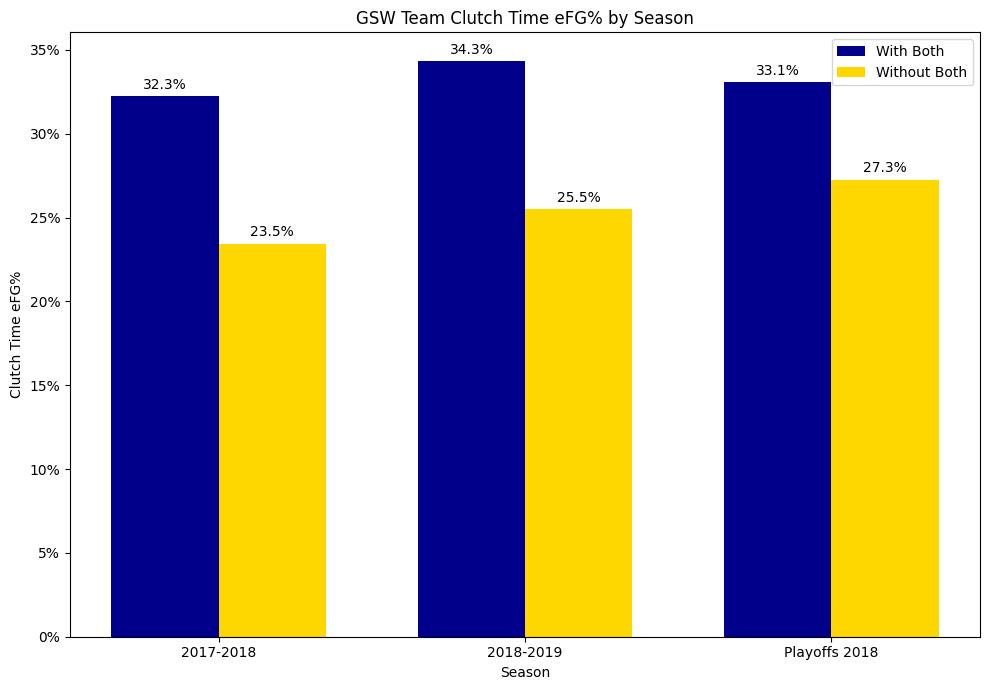

In [119]:
# Updated visualization code with requested style changes

import numpy as np
from matplotlib.ticker import FuncFormatter

# Data from the user
data = {
    '2017-2018': {'With Both': 0.3226837060702875, 'Without Both': 0.2345360824742268},
    '2018-2019': {'With Both': 0.34334763948497854, 'Without Both': 0.25510204081632654},
    'Playoffs 2018': {'With Both': 0.3310810810810811, 'Without Both': 0.2727272727272727}
}

# Set up the bar chart
fig, ax = plt.subplots(figsize=(10, 7))

# Define colors for the bars to match the user's original chart
colors = ['darkblue', 'gold']

# Spacing between the bars
bar_width = 0.35
index = np.arange(len(data))

# Creating bars for each season
bars_with = ax.bar(index - bar_width/2, [v['With Both']*100 for v in data.values()], bar_width, label='With Both', color='darkblue')
bars_without = ax.bar(index + bar_width/2, [v['Without Both']*100 for v in data.values()], bar_width, label='Without Both', color='gold')

# Formatting the y-axis labels as percentages
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))

# Adding labels and title
ax.set_xlabel('Season')
ax.set_ylabel('Clutch Time eFG%')
ax.set_title('GSW Team Clutch Time eFG% by Season')
ax.set_xticks(index)
ax.set_xticklabels(data.keys())
ax.legend()

# Function to attach a text label above each bar, displaying its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function to add labels
autolabel(bars_with)
autolabel(bars_without)

# Adjust the layout to prevent the legend from overlapping the bars
fig.tight_layout()

plt.show()


In [119]:
#Step 1: separate the df (GSW games) with Curry and without
#Step 2: calculate

In [154]:
gsw_games = regular_season_2017_2018[regular_season_2017_2018['team'] == 'GSW'] # CHANGE HERE - playoffs 2018

# function to check for Curry's presence
def check_curry(row):
    players = [row[col] for col in ['a1', 'a2', 'a3', 'a4', 'a5', 'h1', 'h2', 'h3', 'h4', 'h5']]
    for player in players:
        if 'Curry' in player:
            return True
    return False

# Apply the function to create a new column indicating Curry's presence
gsw_games['Curry_On_Field'] = gsw_games.apply(check_curry, axis=1)

gsw_games_with_curry = gsw_games[gsw_games['Curry_On_Field'] == True]

# Filter for games without Curry on the field
gsw_games_without_curry = gsw_games[gsw_games['Curry_On_Field'] == False]


<ipython-input-154-ecaff7d99d8b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gsw_games['Curry_On_Field'] = gsw_games.apply(check_curry, axis=1)


In [155]:
# Assuming we don't have direct total game points, we may need to aggregate points by game_id for accuracy
# We'll use the 'away_score' and 'home_score' at the final record of each game to calculate average points per game

# For games with Curry, find the final score of each game by filtering the last occurrence of each game_id
final_scores_with_curry = gsw_games_with_curry.groupby('game_id').last()

# For games without Curry, do the same
final_scores_without_curry = gsw_games_without_curry.groupby('game_id').last()

# Assuming 'away_score' and 'home_score' reflect the final scores, we calculate the average
# This assumes GSW's scores are correctly captured in one of these columns for the games in question
avg_score_with_curry = final_scores_with_curry[['away_score', 'home_score']].mean().mean()
avg_score_without_curry = final_scores_without_curry[['away_score', 'home_score']].mean().mean()

avg_score_with_curry, avg_score_without_curry


(101.50980392156862, 106.07926829268293)

In [175]:
gsw_games = regular_season_2017_2018[regular_season_2017_2018['team'] == 'GSW'].copy()  # Add .copy() here

def is_gsw_home(game_file):
    # Splitting the GameFile string on '@' and checking if GSW is listed second (home) or first (away)
    teams = game_file.split('@')
    return 'GSW' in teams[1]

# Apply the function to determine GSW's home/away status
gsw_games['GSW_Is_Home'] = gsw_games['GameFile'].apply(is_gsw_home)

# Function to select the correct score based on GSW's home/away status
def select_correct_score(row):
    if row['GSW_Is_Home']:
        return row['home_score']
    else:
        return row['away_score']

# Apply this function to select the correct final score for GSW in games with and without Curry
final_scores_with_curry['GSW_Final_Score'] = final_scores_with_curry.apply(select_correct_score, axis=1)
final_scores_without_curry['GSW_Final_Score'] = final_scores_without_curry.apply(select_correct_score, axis=1)

# Now, calculate the average final score for games with and without Curry
avg_score_with_curry = final_scores_with_curry['GSW_Final_Score'].mean()
avg_score_without_curry = final_scores_without_curry['GSW_Final_Score'].mean()

avg_score_with_curry, avg_score_without_curry


KeyError: 'GSW_Is_Home'

In [167]:

# Function to determine if GSW is home or away based on the GameFile column
def is_gsw_home(game_file):
    # Splitting the GameFile string on '@' and checking if GSW is listed second (home) or first (away)
    teams = game_file.split('@')
    return 'GSW' in teams[1]

# Apply the function to determine GSW's home/away status
gsw_games['GSW_Is_Home'] = gsw_games['GameFile'].apply(is_gsw_home)

In [194]:
import pandas as pd

# Assuming 'regular_season_2017_2018' is your DataFrame containing all game data
gsw_games = playoff_2019[playoff_2019['team'] == 'GSW'].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Function to check for Curry's presence
def check_curry(row):
    players = [row[col] for col in ['a1', 'a2', 'a3', 'a4', 'a5', 'h1', 'h2', 'h3', 'h4', 'h5']]
    return any('Curry' in player for player in players)

# Apply the function to create a new column indicating Curry's presence
gsw_games['Curry_On_Field'] = gsw_games.apply(check_curry, axis=1)

# Function to determine if GSW is the home team based on the GameFile naming convention
def is_gsw_home(game_file):
    parts = game_file.split('-')
    matchup = parts[-1].split('.')[0]  # Extracting the matchup part, e.g., 'GSW@NOP'
    return matchup.split('@')[1] == 'GSW'  # GSW is home if it appears after '@'

# Apply the function to determine GSW's home/away status
gsw_games['GSW_Is_Home'] = gsw_games['GameFile'].apply(is_gsw_home)

# Function to select the correct final score for GSW
def select_correct_score(row):
    return row['home_score'] if row['GSW_Is_Home'] else row['away_score']

# Separate the dataset into games with and without Curry
gsw_games_with_curry = gsw_games[gsw_games['Curry_On_Field']]
gsw_games_without_curry = gsw_games[~gsw_games['Curry_On_Field']]

# Group by game_id to get the last record of each game, assuming it reflects the final score
final_scores_with_curry = gsw_games_with_curry.groupby('game_id').last()
final_scores_without_curry = gsw_games_without_curry.groupby('game_id').last()

# Apply the function to select the correct final score for games with and without Curry
final_scores_with_curry['GSW_Final_Score'] = final_scores_with_curry.apply(select_correct_score, axis=1)
final_scores_without_curry['GSW_Final_Score'] = final_scores_without_curry.apply(select_correct_score, axis=1)

# Calculate the average final score for games with and without Curry
avg_score_with_curry = final_scores_with_curry['GSW_Final_Score'].mean()
avg_score_without_curry = final_scores_without_curry['GSW_Final_Score'].mean()

avg_score_with_curry, avg_score_without_curry


(112.9090909090909, 95.89473684210526)

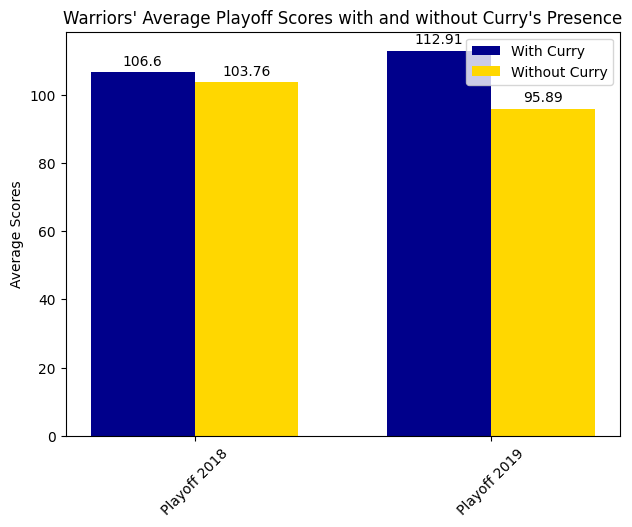

In [200]:
import matplotlib.pyplot as plt
import numpy as np

# Data
seasons = [ 'Playoff 2018', 'Playoff 2019']
avg_scores_with_curry = [106.6, 112.91]
avg_scores_without_curry = [ 103.76, 95.89]

x = np.arange(len(seasons))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, avg_scores_with_curry, width, label='With Curry', color='darkblue')
rects2 = ax.bar(x + width/2, avg_scores_without_curry, width, label='Without Curry', color='gold')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Scores')
ax.set_title('Warriors\' Average Playoff Scores with and without Curry\'s Presence')
ax.set_xticks(x)
ax.set_xticklabels(seasons)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.xticks(rotation=45)
plt.show()


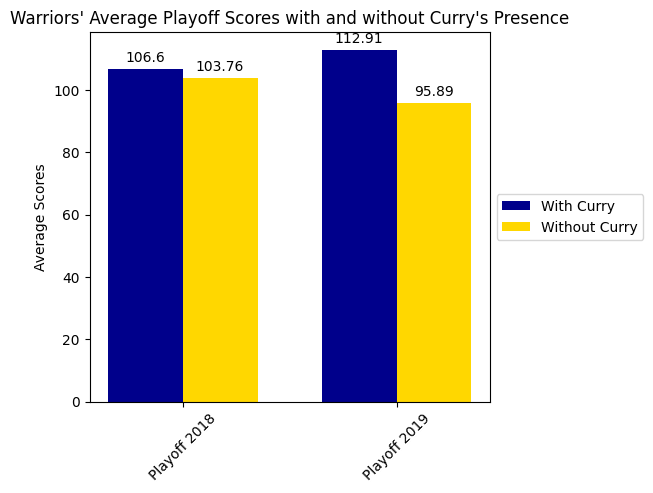

In [201]:
import matplotlib.pyplot as plt
import numpy as np

# Data
seasons = ['Playoff 2018', 'Playoff 2019']
avg_scores_with_curry = [106.6, 112.91]
avg_scores_without_curry = [103.76, 95.89]

x = np.arange(len(seasons))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, avg_scores_with_curry, width, label='With Curry', color='darkblue')
rects2 = ax.bar(x + width/2, avg_scores_without_curry, width, label='Without Curry', color='gold')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Scores')
ax.set_title('Warriors\' Average Playoff Scores with and without Curry\'s Presence')
ax.set_xticks(x)
ax.set_xticklabels(seasons)
ax.legend()

# Add labels above the bars
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

# Adjust layout to make room for the legend and prevent overlap
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])  # Resize position
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside

# Adjust subplots to fit figure area (taking the legend into account)
plt.subplots_adjust(right=0.75)

plt.xticks(rotation=45)
plt.show()


In [196]:
# Function to select the correct final score for the opponent
def select_opponent_final_score(row):
    return row['away_score'] if row['GSW_Is_Home'] else row['home_score']

# Apply the function to get the opponent's final score for games with and without Curry
final_scores_with_curry['Opponent_Final_Score'] = final_scores_with_curry.apply(select_opponent_final_score, axis=1)
final_scores_without_curry['Opponent_Final_Score'] = final_scores_without_curry.apply(select_opponent_final_score, axis=1)

# Determine win or loss for GSW in games with and without Curry
final_scores_with_curry['GSW_Win'] = final_scores_with_curry['GSW_Final_Score'] > final_scores_with_curry['Opponent_Final_Score']
final_scores_without_curry['GSW_Win'] = final_scores_without_curry['GSW_Final_Score'] > final_scores_without_curry['Opponent_Final_Score']

# Calculate win/loss ratio for games with and without Curry
win_ratio_with_curry = final_scores_with_curry['GSW_Win'].mean()
win_ratio_without_curry = final_scores_without_curry['GSW_Win'].mean()

win_ratio_with_curry, win_ratio_without_curry


(0.6363636363636364, 0.7368421052631579)

In [49]:
games_with_both.head(10) # regular season 2017-2018

,Unnamed: 0,game_id,data_set,date,a1,a2,a3,a4,a5,h1,h2,h3,h4,h5,period,away_score,home_score,remaining_time,elapsed,play_length,play_id,team,event_type,assist,away,home,block,entered,left,num,opponent,outof,player,points,possession,reason,result,steal,type,shot_distance,original_x,original_y,converted_x,converted_y,description,GameFile,Unnamed: 44,Unnamed: 45,total_seconds_remaining,score_difference,is_clutch,is_three_pointer,is_two_pointer,3PT_Attempts
21854,3,"=""0021700100""",2017-2018 Regular Season,2017-10-30,Kevin Durant,Draymond Green,Zaza Pachulia,Klay Thompson,Stephen Curry,Danilo Gallinari,Blake Griffin,DeAndre Jordan,Austin Rivers,Patrick Beverley,1,0,0,00:11:34,00:00:26,00:00:03,8,GSW,rebound,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Draymond Green,NaN,NaN,NaN,NaN,NaN,rebound defensive,NaN,NaN,NaN,NaN,NaN,Green REBOUND (Off:0 Def:1),[2017-10-30]-0021700100-GSW@LAC.csv,NaN,NaN,694,0,False,False,False,False
21855,4,"=""0021700100""",2017-2018 Regular Season,2017-10-30,Kevin Durant,Draymond Green,Zaza Pachulia,Klay Thompson,Stephen Curry,Danilo Gallinari,Blake Griffin,DeAndre Jordan,Austin Rivers,Patrick Beverley,1,0,0,00:11:31,00:00:29,00:00:03,9,GSW,miss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Klay Thompson,0.0,NaN,NaN,missed,NaN,Pullup Jump Shot,26.0,143.0,214.0,10.7,26.4,MISS Thompson 26' 3PT Pullup Jump Shot,[2017-10-30]-0021700100-GSW@LAC.csv,NaN,NaN,691,0,False,False,False,True
21858,7,"=""0021700100""",2017-2018 Regular Season,2017-10-30,Kevin Durant,Draymond Green,Zaza Pachulia,Klay Thompson,Stephen Curry,Danilo Gallinari,Blake Griffin,DeAndre Jordan,Austin Rivers,Patrick Beverley,1,0,2,00:10:47,00:01:13,00:00:26,13,GSW,miss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Klay Thompson,0.0,NaN,NaN,missed,NaN,Fadeaway Jumper,7.0,62.0,26.0,18.8,7.6,MISS Thompson 7' Fadeaway Jumper,[2017-10-30]-0021700100-GSW@LAC.csv,NaN,NaN,647,2,False,False,False,False
21861,10,"=""0021700100""",2017-2018 Regular Season,2017-10-30,Kevin Durant,Draymond Green,Zaza Pachulia,Klay Thompson,Stephen Curry,Danilo Gallinari,Blake Griffin,DeAndre Jordan,Austin Rivers,Patrick Beverley,1,0,2,00:10:36,00:01:24,00:00:06,17,GSW,miss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stephen Curry,0.0,NaN,NaN,missed,NaN,Jump Shot,23.0,-229.0,-8.0,47.9,4.2,MISS Curry 3PT Jump Shot,[2017-10-30]-0021700100-GSW@LAC.csv,NaN,NaN,636,2,False,False,False,True
21863,12,"=""0021700100""",2017-2018 Regular Season,2017-10-30,Kevin Durant,Draymond Green,Zaza Pachulia,Klay Thompson,Stephen Curry,Danilo Gallinari,Blake Griffin,DeAndre Jordan,Austin Rivers,Patrick Beverley,1,0,2,00:10:24,00:01:36,00:00:10,20,GSW,foul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zaza Pachulia,NaN,NaN,t.foul def. 3 sec,NaN,NaN,t.foul def. 3 sec,NaN,NaN,NaN,NaN,NaN,Warriors T.Foul (Def. 3 Sec Pachulia ) (J.Goble),[2017-10-30]-0021700100-GSW@LAC.csv,NaN,NaN,624,2,False,False,False,False
21866,15,"=""0021700100""",2017-2018 Regular Season,2017-10-30,Kevin Durant,Draymond Green,Zaza Pachulia,Klay Thompson,Stephen Curry,Danilo Gallinari,Blake Griffin,DeAndre Jordan,Austin Rivers,Patrick Beverley,1,0,3,00:10:05,00:01:55,00:00:03,23,GSW,rebound,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Draymond Green,NaN,NaN,NaN,NaN,NaN,rebound defensive,NaN,NaN,NaN,NaN,NaN,Green REBOUND (Off:0 Def:2),[2017-10-30]-0021700100-GSW@LAC.csv,NaN,NaN,605,3,False,False,False,False
21868,17,"=""0021700100""",2017-2018 Regular Season,2017-10-30,Kevin Durant,Draymond Green,Zaza Pachulia,Klay Thompson,Stephen Curry,Danilo Gallinari,Blake Griffin,DeAndre Jordan,Austin Rivers,Patrick Beverley,1,0,3,00:09:58,00:02:02,00:00:00,26,GSW,free throw,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,Draymond Green,0.0,NaN,NaN,missed,NaN,Free Throw 1 of 2,NaN,NaN,NaN,NaN,NaN,MISS Green Free Throw 1 of 2,[2017-10-30]-0021700100-GSW@LAC.csv,NaN,NaN,598,3,False,False,False,False
21870,19,"=""0021700100""",2017-2018 Regular Season,2017-10-30,Kevin Durant,Draymond Green,Zaza Pachulia,Klay Thompson,Stephen Curry,Danilo Gallinari,Blake Griffin,DeAndre Jordan,Austin Rivers,Patrick Beverley,1,1

In [45]:
games_without_both.shape ## regular season 2017-2018

(222, 54)

In [50]:
curry_shots_2017_2018 = regular_season_2017_2018[(regular_season_2017_2018['event_type'].isin(['shot', 'miss'])) & (regular_season_2017_2018['player'] == 'Stephen Curry')]

#let's separate his 3 pointers

curry_shots_2017_2018['is_three_pointer'] = curry_shots_2017_2018['description'].str.contains('3PT')
curry_shots_2017_2018['is_three_pointer']


field_goals_made = curry_shots_2017_2018[curry_shots_2017_2018['result'] == 'made'].shape[0]
field_goals_attempted = curry_shots_2017_2018.shape[0]
three_point_field_goal_made = curry_shots_2017_2018[(curry_shots_2017_2018['result'] == 'made') & (curry_shots_2017_2018['is_three_pointer'])].shape[0]


efg_percentage1 = (field_goals_made + 0.5 * three_point_field_goal_made) / field_goals_attempted

print(f"Stephen Curry's eFG% for the 2017-2018 season is: {efg_percentage1*100:.2f}%")

Stephen Curry's eFG% for the 2017-2018 season is: 61.81%


<ipython-input-50-2c34cdc4d157>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curry_shots_2017_2018['is_three_pointer'] = curry_shots_2017_2018['description'].str.contains('3PT')


# March 6th, 2024 - EDA with upgraded dataset.


In [ ]:
regular_season_2017_2018.groupby('data_set')['game_id'].nunique()

data_set
2017-2018 Regular Season    1230
Name: game_id, dtype: int64

In [ ]:
regular_season_2017_2018.columns.to_list()

['Unnamed: 0',
 'game_id',
 'data_set',
 'date',
 'a1',
 'a2',
 'a3',
 'a4',
 'a5',
 'h1',
 'h2',
 'h3',
 'h4',
 'h5',
 'period',
 'away_score',
 'home_score',
 'remaining_time',
 'elapsed',
 'play_length',
 'play_id',
 'team',
 'event_type',
 'assist',
 'away',
 'home',
 'block',
 'entered',
 'left',
 'num',
 'opponent',
 'outof',
 'player',
 'points',
 'possession',
 'reason',
 'result',
 'steal',
 'type',
 'shot_distance',
 'original_x',
 'original_y',
 'converted_x',
 'converted_y',
 'description',
 'GameFile',
 'Unnamed: 44',
 'Unnamed: 45',
 'total_seconds_remaining',
 'score_difference',
 'is_clutch',
 'is_three_pointer',
 'is_two_pointer',
 '3PT_Attempts']

In [ ]:
regular_season_2017_2018['event_type'].unique()

array(['start of period', 'jump ball', 'shot', 'turnover', 'miss',
       'rebound', 'timeout', 'foul', 'free throw', 'sub', 'end of period',
       'violation', 'unknown', 'ejection', nan], dtype=object)

In [ ]:
clutch_plays = regular_season_2017_2018[regular_season_2017_2018['is_clutch']]

In [ ]:
curry_clutch_shots = clutch_plays[(clutch_plays['event_type'].isin(['shot', 'miss'])) & (clutch_plays['player'] == 'Stephen Curry')]
threes_attempted = curry_clutch_shots[curry_clutch_shots['is_three_pointer'] == True]

In [ ]:
fgm = len(curry_clutch_shots[curry_clutch_shots['result'] == 'made'])  # field Goals Made
fga = len(curry_clutch_shots)  # field Goal Attempts
threes_made = len(threes_attempted[threes_attempted['result'] == 'made'])  # 3-Point Field Goals Made

curry_efg_pct = (fgm + 0.5 * threes_made) / fga if fga > 0 else 0


In [ ]:
curry_efg_pct

0.5535714285714286

In [ ]:
curry_shots_season_2017_2018 = regular_season_2017_2018[(regular_season_2017_2018['event_type'].isin(['shot', 'miss'])) & (regular_season_2017_2018['player'] == 'Stephen Curry')]
threes_attempted = curry_shots_season_2017_2018[curry_shots_season_2017_2018['is_three_pointer'] == True]
threes_made = len(threes_attempted[threes_attempted['result'] == 'made'])
# Number of three-point attempts
threes_attempted_count = len(threes_attempted)

# Calculate 3-Point Percentage (3P%)
curry_3p_pct = threes_made / threes_attempted_count if threes_attempted_count > 0 else 0

# Print the 3P%
print(f"Stephen Curry's 3P% for the 2017-2018 regular season is: {curry_3p_pct:.2%}")


Stephen Curry's 3P% for the 2017-2018 regular season is: 100.00%


Snipped above made me rethink the strategy and create a new feature called 3pt_Attempts

In [ ]:
# Filter to get all shots by Stephen Curry
curry_shots_season_2017_2018 = regular_season_2017_2018[(regular_season_2017_2018['event_type'].isin(['shot', 'miss'])) & (regular_season_2017_2018['player'] == 'Stephen Curry')]

# Assuming '3PT_Attempts' is a boolean column indicating whether a shot was a 3PT attempt
# Filter to get all three-point attempts by Stephen Curry
threes_attempted = curry_shots_season_2017_2018[curry_shots_season_2017_2018['3PT_Attempts'] == True]

# Count of made three-point shots
threes_made = threes_attempted[threes_attempted['result'] == 'made'].shape[0]

# Total number of three-point attempts
threes_attempted_count = threes_attempted.shape[0]

# Calculate 3-Point Percentage (3P%)
curry_3p_pct = threes_made / threes_attempted_count if threes_attempted_count > 0 else 0

# Print the 3P%
print(f"Stephen Curry's 3P% for the 2017-2018 regular season is: {curry_3p_pct:.2%}")


Stephen Curry's 3P% for the 2017-2018 regular season is: 42.22%


In [ ]:
# Filter to get all shots by Stephen Curry
curry_shots_season_2017_2018 = regular_season_2017_2018[(regular_season_2017_2018['event_type'].isin(['shot', 'miss'])) & (regular_season_2017_2018['player'] == 'Klay Thompson')]

# Assuming '3PT_Attempts' is a boolean column indicating whether a shot was a 3PT attempt
# Filter to get all three-point attempts by Stephen Curry
threes_attempted = curry_shots_season_2017_2018[curry_shots_season_2017_2018['3PT_Attempts'] == True]

# Count of made three-point shots
threes_made = threes_attempted[threes_attempted['result'] == 'made'].shape[0]

# Total number of three-point attempts
threes_attempted_count = threes_attempted.shape[0]

# Calculate 3-Point Percentage (3P%)
curry_3p_pct = threes_made / threes_attempted_count if threes_attempted_count > 0 else 0

# Print the 3P%
print(f"Klay Thompson's 3P% for the 2017-2018 regular season is: {curry_3p_pct:.2%}")


Klay Thompson's 3P% for the 2017-2018 regular season is: 44.19%


# Part B - Plus/Minus Rating

In [ ]:
regular_season_2017_2018.head(1)

,Unnamed: 0,game_id,data_set,date,a1,a2,a3,a4,a5,h1,h2,h3,h4,h5,period,away_score,home_score,remaining_time,elapsed,play_length,play_id,team,event_type,assist,away,home,block,entered,left,num,opponent,outof,player,points,possession,reason,result,steal,type,shot_distance,original_x,original_y,converted_x,converted_y,description,GameFile,Unnamed: 44,Unnamed: 45,total_seconds_remaining,score_difference,is_clutch,is_three_pointer,is_two_pointer,3PT_Attempts
0,0,"=""0021701224""",2017-2018 Regular Season,2018-04-11,Stanley Johnson,Anthony Tolliver,Eric Moreland,Luke Kennard,Reggie Jackson,David Nwaba,Lauri Markkanen,Cristiano Felicio,Sean Kilpatrick,Cameron Payne,1,0,0,00:12:00,00:00:00,00:00:00,2,NaN,start of period,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start of period,NaN,NaN,NaN,NaN,NaN,NaN,[2018-04-11]-0021701224-DET@CHI.csv,NaN,NaN,720,0,False,False,False,False


In [ ]:

# Simplify the check for Curry being on the court
# Assuming 'Stephen Curry' is the exact name used in the dataset
regular_season_2017_2018['curry_on_court'] = regular_season_2017_2018[['a1', 'a2', 'a3', 'a4', 'a5', 'h1', 'h2', 'h3', 'h4', 'h5']].apply(lambda x: 'Stephen Curry' in x.values, axis=1)

# Example: Show the first few rows to verify if the column is marked correctly
test = regular_season_2017_2018[['game_id', 'a1', 'a2', 'a3', 'a4', 'a5', 'h1', 'h2', 'h3', 'h4', 'h5', 'curry_on_court']].head(10000)

test[test['curry_on_court'] == True].head(10)

<ipython-input-31-54ec13613392>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_season_2017_2018['curry_on_court'] = regular_season_2017_2018[['a1', 'a2', 'a3', 'a4', 'a5', 'h1', 'h2', 'h3', 'h4', 'h5']].apply(lambda x: 'Stephen Curry' in x.values, axis=1)


,game_id,a1,a2,a3,a4,a5,h1,h2,h3,h4,h5,curry_on_court


In [ ]:

regular_season_2017_2018['curry_on_court'] = regular_season_2017_2018[['a1', 'a2', 'a3', 'a4', 'a5', 'h1', 'h2', 'h3', 'h4', 'h5']].apply(lambda x: 'Stephen Curry' in x.values, axis=1)


<ipython-input-40-10091d6c6693>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_season_2017_2018['curry_on_court'] = regular_season_2017_2018[['a1', 'a2', 'a3', 'a4', 'a5', 'h1', 'h2', 'h3', 'h4', 'h5']].apply(lambda x: 'Stephen Curry' in x.values, axis=1)


(15898, 12)

In [ ]:
# Assuming 'team' indicates Warriors and 'opponent' indicates the opposing team.
# Filter for games where Curry played for initial simplicity.
games_curry_played = regular_season_2017_2018[regular_season_2017_2018['curry_on_court']].drop_duplicates('game_id')


# Initialize columns for on-court points for and against.
regular_season_2017_2018['points_for_on_court'] = 0
regular_season_2017_2018['points_against_on_court'] = 0

# For each game Curry played, calculate the points while he was on the court.
for game_id in games_curry_played['game_id']:
    game_events = regular_season_2017_2018[regular_season_2017_2018['game_id'] == game_id]
    # Points for Warriors when Curry is on the court.
    points_for = game_events[(game_events['curry_on_court']) & (game_events['team'] == 'GSW')]['points'].sum()
    # Points against Warriors when Curry is on the court.
    points_against = game_events[(game_events['curry_on_court']) & (game_events['team'] != 'GSW')]['points'].sum()

    regular_season_2017_2018.loc[regular_season_2017_2018['game_id'] == game_id, 'points_for_on_court'] = points_for
    regular_season_2017_2018.loc[regular_season_2017_2018['game_id'] == game_id, 'points_against_on_court'] = points_against


<ipython-input-44-4e1f9f4bccbf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_season_2017_2018['points_for_on_court'] = 0
<ipython-input-44-4e1f9f4bccbf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_season_2017_2018['points_against_on_court'] = 0


In [ ]:
# Selecting Stephen Curry as our case study star player for the analysis
star_player = 'Stephen Curry'

# Filtering events where Stephen Curry is on the court
curry_on_court = regular_season_2017_2018[regular_season_2017_2018['player'] == star_player]

# Getting the game IDs and play IDs where Stephen Curry is on the court
curry_games = curry_on_court['game_id'].unique()
curry_play_ids = curry_on_court['play_id'].unique()

# Filtering teammate events: plays where Stephen Curry's teammates are involved when he is on the court
teammates_performance_on = regular_season_2017_2018[(regular_season_2017_2018['game_id'].isin(curry_games)) & (regular_season_2017_2018['play_id'].isin(curry_play_ids)) & (regular_season_2017_2018['player'] != star_player)]

# Calculating teammates' shooting percentage and points scored when Curry is on the court
# Considering only shot events for shooting percentage calculation
shots_on = teammates_performance_on[teammates_performance_on['event_type'] == 'shot']
shooting_percentage_on = shots_on['points'].sum() / shots_on.shape[0]

# Calculating total points scored by teammates when Curry is on the court
total_points_on = shots_on['points'].sum()

# Now, we need to calculate the same metrics for when Curry is off the court
# This involves a bit more complexity, as we need to filter out the plays where Curry is not playing

# Let's start with a simplification: assume any play not involving Curry in the selected games is with him off the court
teammates_performance_off = regular_season_2017_2018[(regular_season_2017_2018['game_id'].isin(curry_games)) & (~regular_season_2017_2018['play_id'].isin(curry_play_ids)) & (regular_season_2017_2018['player'] != star_player)]

# Calculating teammates' shooting percentage and points scored when Curry is off the court
shots_off = teammates_performance_off[teammates_performance_off['event_type'] == 'shot']
shooting_percentage_off = shots_off['points'].sum() / shots_off.shape[0]

# Calculating total points scored by teammates when Curry is off the court
total_points_off = shots_off['points'].sum()

shooting_percentage_on, total_points_on, shooting_percentage_off, total_points_off


(2.2557427258805514, 7365.0, 2.211023622047244, 1404.0)

In [ ]:
# Filter plays involving Stephen Curry
curry_plays = regular_season_2017_2018[regular_season_2017_2018['player'] == 'Stephen Curry']

# Assuming 'team' is the team Curry plays for and 'opponent' is the opposing team
# We calculate the point differential for each of Curry's plays
# Note: This assumes 'away_score' and 'home_score' reflect the score at the time of each play
# and that 'team' indicates Curry's team (either 'away' or 'home')
curry_plays['point_differential'] = curry_plays.apply(lambda x: (x['away_score'] - x['home_score']) if x['team'] == 'away' else (x['home_score'] - x['away_score']), axis=1)

# Calculate Curry's total Plus/Minus while on the court
curry_plus_minus = curry_plays['point_differential'].sum()

# Output the result
print(f"Stephen Curry's Simplified Plus/Minus: {curry_plus_minus}")


Stephen Curry's Simplified Plus/Minus: 61


<ipython-input-71-da5616dc66d4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curry_plays['point_differential'] = curry_plays.apply(lambda x: (x['away_score'] - x['home_score']) if x['team'] == 'away' else (x['home_score'] - x['away_score']), axis=1)


In [ ]:
# Assume df is the dataframe with the play-by-play data

# Filter shots taken by teammates when Curry is involved in a play (approximating this as him being on the court)
shots_with_curry = regular_season_2017_2018[(regular_season_2017_2018['player'] != 'Stephen Curry') & (regular_season_2017_2018['event_type'] == 'shot') & (regular_season_2017_2018['play_id'].isin(curry_plays['play_id']))]

# Filter shots taken by teammates when Curry is not involved in a play (approximating this as him being off the court)
shots_without_curry = regular_season_2017_2018[(regular_season_2017_2018['player'] != 'Stephen Curry') & (regular_season_2017_2018['event_type'] == 'shot') & (~regular_season_2017_2018['play_id'].isin(curry_plays['play_id']))]

# Calculate metrics for both scenarios
def calculate_shot_metrics(shots_df):
    total_shots = len(shots_df)
    three_point_attempts = shots_df['is_three_pointer'].sum()  # Assuming a column 'is_three_pointer' exists
    avg_shot_distance = shots_df['shot_distance'].mean()  # Assuming a column 'shot_distance' exists
    three_point_ratio = three_point_attempts / total_shots if total_shots else 0
    return total_shots, three_point_ratio, avg_shot_distance

metrics_with_curry = calculate_shot_metrics(shots_with_curry)
metrics_without_curry = calculate_shot_metrics(shots_without_curry)

metrics_with_curry, metrics_without_curry


In [ ]:
# Given the structure of the dataset, we need to identify the specific columns where Curry might be listed.
# These columns are 'a1' to 'a5' for away team players and 'h1' to 'h5' for home team players.

# Filter for plays where Curry is on the court.
# For simplicity, assuming "Stephen Curry" is listed as such, we'll look for rows where his name appears in any of the player columns.

# First, let's create a mask that identifies whether Stephen Curry is on the court
curry_on_court_mask = regular_season_2017_2018[['a1', 'a2', 'a3', 'a4', 'a5', 'h1', 'h2', 'h3', 'h4', 'h5']].apply(lambda x: x.str.contains('Stephen Curry', na=False)).any(axis=1)

# Now, we filter the dataframe for the instances where Curry is on the court
df_curry_on_court = regular_season_2017_2018[curry_on_court_mask]

# Let's check how many entries we have with Curry on the court, and display a few rows to verify the filtering
num_entries_curry_on_court = df_curry_on_court.shape[0]
df_curry_on_court_sample = df_curry_on_court.head()

num_entries_curry_on_court, df_curry_on_court_sample


(15898,
        Unnamed: 0        game_id                  data_set        date  \
 21851           0  ="0021700100"  2017-2018 Regular Season  2017-10-30   
 21852           1  ="0021700100"  2017-2018 Regular Season  2017-10-30   
 21853           2  ="0021700100"  2017-2018 Regular Season  2017-10-30   
 21854           3  ="0021700100"  2017-2018 Regular Season  2017-10-30   
 21855           4  ="0021700100"  2017-2018 Regular Season  2017-10-30   
 
                  a1              a2             a3             a4  \
 21851  Kevin Durant  Draymond Green  Zaza Pachulia  Klay Thompson   
 21852  Kevin Durant  Draymond Green  Zaza Pachulia  Klay Thompson   
 21853  Kevin Durant  Draymond Green  Zaza Pachulia  Klay Thompson   
 21854  Kevin Durant  Draymond Green  Zaza Pachulia  Klay Thompson   
 21855  Kevin Durant  Draymond Green  Zaza Pachulia  Klay Thompson   
 
                   a5                h1             h2              h3  \
 21851  Stephen Curry  Danilo Gallinari  Bla

In [ ]:
# Simplified calculations for the outlined metrics

# For the purpose of this analysis, we will make some simplifications due to the complexity of accurately calculating possessions
# and other detailed metrics directly from play-by-play data without specific markers for possessions or detailed shot outcome data.

# 1. Team Offensive Efficiency (simplified as points scored in the plays where Curry is on the court divided by total entries,
#    this is a very rough approximation as it doesn't account for possessions properly)

# Identify points scored in plays with Curry on the court (we'll use a simplified approach to check for description containing "PTS")
points_scored_with_curry = df_curry_on_court['description'].str.extract(r'(\d) PTS').dropna().astype(int).sum()[0]

# Calculate a simplified offensive efficiency (Note: This is not accurate but gives a basic idea)
offensive_efficiency_with_curry = (points_scored_with_curry / num_entries_curry_on_court) * 100  # Points per 100 plays

# 2. Plus/Minus Rating (simplified as score difference changes in plays with Curry on the court)
#    We'll calculate the net score difference change as an indicator.
plus_minus_with_curry = df_curry_on_court['score_difference'].diff().sum()

offensive_efficiency_with_curry, plus_minus_with_curry


(112.31601459303057, 8.0)

In [ ]:
# Given the large number of columns and the goal to identify when Curry is on the court,
# we'll search for his name in the relevant player columns.

# Filter for rows where Stephen Curry appears to be one of the players on the court.
# Assuming Curry's name would be listed in one of the player columns (a1 to a5 for away team, h1 to h5 for home team).
curry_rows = regular_season_2017_2018[regular_season_2017_2018.filter(regex='^(a[1-5]|h[1-5])$').apply(lambda x: x.str.contains('Curry', na=False)).any(axis=1)]

# Check if we successfully filtered rows with Curry and view a sample to proceed
curry_sample = curry_rows.head()

curry_sample[['date', 'a1', 'a2', 'a3', 'a4', 'a5', 'h1', 'h2', 'h3', 'h4', 'h5', 'description']].head()

# Identifying opponent scoring actions when Curry is on the court.
# Assuming scoring actions are identifiable in the description column,
# and considering the structure of the data, we will have to infer possessions
# and scoring by descriptions of made shots, free throws, etc.

# Filter for descriptions that indicate scoring by the opponent.
opponent_scoring = curry_rows[curry_rows['description'].str.contains('MISS', na=False) == False]

# Calculate opponent scoring efficiency as total points scored by opponents while Curry is on the court.
# For simplicity, we'll count each scoring action as 2 points (this will be an approximation since it includes
# both 2-pointers and 3-pointers, and does not account for free throws accurately).

# Count of opponent scoring actions
opponent_scoring_actions_count = opponent_scoring.shape[0]

# Estimate opponent points scored (approximation)
estimated_opponent_points = opponent_scoring_actions_count * 2  # Simplified estimation

# Counting steals and blocks when Curry is on the court
# Assuming steals and blocks are also indicated in the description
steals_blocks = curry_rows[curry_rows['description'].str.contains('STEAL|BLOCK', na=True, case=False)]
steals_blocks_count = steals_blocks.shape[0]

estimated_opponent_points, steals_blocks_count


(24904, 1291)

In [ ]:
################################################################ 2018 ################################################################################################
#stephen's all shots and misses

curry_shots_2017_2018 = regular_season_2017_2018[(regular_season_2017_2018['event_type'].isin(['shot', 'miss'])) & (regular_season_2017_2018['player'] == 'Stephen Curry')]

#let's separate his 3 pointers

curry_shots_2017_2018['is_three_pointer'] = curry_shots_2017_2018['description'].str.contains('3PT')
curry_shots_2017_2018['is_three_pointer']


field_goals_made = curry_shots_2017_2018[curry_shots_2017_2018['result'] == 'made'].shape[0]
field_goals_attempted = curry_shots_2017_2018.shape[0]
three_point_field_goal_made = curry_shots_2017_2018[(curry_shots_2017_2018['result'] == 'made') & (curry_shots_2017_2018['is_three_pointer'])].shape[0]


efg_percentage1 = (field_goals_made + 0.5 * three_point_field_goal_made) / field_goals_attempted

print(f"Stephen Curry's eFG% for the 2017-2018 season is: {efg_percentage1*100:.2f}%")



################################################################ 2019 ################################################################################################
#stephen's all shots and misses

curry_shots_2018_2019 = regular_season_2018_2019[(regular_season_2018_2019['event_type'].isin(['shot', 'miss'])) & (regular_season_2018_2019['player'] == 'Stephen Curry')]

#let's separate his 3 pointers

curry_shots_2018_2019['is_three_pointer'] = curry_shots_2018_2019['description'].str.contains('3PT')
curry_shots_2018_2019['is_three_pointer']


field_goals_made = curry_shots_2018_2019[curry_shots_2018_2019['result'] == 'made'].shape[0]
field_goals_attempted = curry_shots_2018_2019.shape[0]
three_point_field_goal_made = curry_shots_2018_2019[(curry_shots_2018_2019['result'] == 'made') & (curry_shots_2018_2019['is_three_pointer'])].shape[0]


efg_percentage2 = (field_goals_made + 0.5 * three_point_field_goal_made) / field_goals_attempted

print(f"Stephen Curry's eFG% for the 2018-2019 season is: {efg_percentage2*100:.2f}%")



################################################################ 2020 ################################################################################################
#stephen's all shots and misses

curry_shots_2019_2020 = regular_season_2019_2020[(regular_season_2019_2020['event_type'].isin(['shot', 'miss'])) & (regular_season_2019_2020['player'] == 'Stephen Curry')]

#let's separate his 3 pointers

curry_shots_2019_2020['is_three_pointer'] = curry_shots_2019_2020['description'].str.contains('3PT')
curry_shots_2019_2020['is_three_pointer']


field_goals_made = curry_shots_2019_2020[curry_shots_2019_2020['result'] == 'made'].shape[0]
field_goals_attempted = curry_shots_2019_2020.shape[0]
three_point_field_goal_made = curry_shots_2019_2020[(curry_shots_2019_2020['result'] == 'made') & (curry_shots_2019_2020['is_three_pointer'])].shape[0]


efg_percentage3 = (field_goals_made + 0.5 * three_point_field_goal_made) / field_goals_attempted

print(f"Stephen Curry's eFG% for the 2019-2020 season is: {efg_percentage3*100:.2f}%")

<ipython-input-69-96ce18b16799>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curry_shots_2017_2018['is_three_pointer'] = curry_shots_2017_2018['description'].str.contains('3PT')
<ipython-input-69-96ce18b16799>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curry_shots_2018_2019['is_three_pointer'] = curry_shots_2018_2019['description'].str.contains('3PT')


Stephen Curry's eFG% for the 2017-2018 season is: 61.81%
Stephen Curry's eFG% for the 2018-2019 season is: 60.37%
Stephen Curry's eFG% for the 2019-2020 season is: 47.56%


<ipython-input-69-96ce18b16799>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curry_shots_2019_2020['is_three_pointer'] = curry_shots_2019_2020['description'].str.contains('3PT')


In [ ]:
# curry WITH and WITHOUT thompson events
curry_without_thompson_mask = regular_season_2017_2018[['a1','a2','a3','a4','a5','h1','h2','h3','h4','h5']].apply(lambda x: 'Stephen Curry' in x.values and 'Klay Thompson' not in x.values, axis=1)
curry_without_thompson_events = regular_season_2017_2018[curry_without_thompson_mask]

curry_with_thompson_mask = regular_season_2017_2018[['a1','a2','a3','a4','a5','h1','h2','h3','h4','h5']].apply(lambda x: 'Stephen Curry' in x.values and 'Klay Thompson' in x.values, axis=1)
curry_with_thompson_events = regular_season_2017_2018[curry_with_thompson_mask]

# Filter for Curry's made shots and three-point made shots when solo
curry_solo_made_shots = curry_without_thompson_events[curry_without_thompson_events['result'] == 'made']
curry_solo_three_point_made = curry_solo_made_shots[curry_solo_made_shots['description'].str.contains('3PT')]

# Calculate eFG%
curry_solo_efg = (len(curry_solo_made_shots) + 0.5 * len(curry_solo_three_point_made)) / len(curry_without_thompson_events)
curry_solo_efg_percentage = curry_solo_efg * 100

# Filter for Curry's made shots and three-point made shots when playing with Thompson
curry_with_thompson_made_shots = curry_with_thompson_events[curry_with_thompson_events['result'] == 'made']
curry_with_thompson_three_point_made = curry_with_thompson_made_shots[curry_with_thompson_made_shots['description'].str.contains('3PT')]

# Calculate eFG%
curry_with_thompson_efg = (len(curry_with_thompson_made_shots) + 0.5 * len(curry_with_thompson_three_point_made)) / len(curry_with_thompson_events)
curry_with_thompson_efg_percentage = curry_with_thompson_efg * 100

print(f"Stephen Curry's eFG% without Klay Thompson in the 2017-2018 season: {curry_solo_efg_percentage:.2f}%")
print(f"Stephen Curry's eFG% with Klay Thompson in the 2017-2018 season: {curry_with_thompson_efg_percentage:.2f}%")

Stephen Curry's eFG% without Klay Thompson in the 2017-2018 season: 28.29%
Stephen Curry's eFG% with Klay Thompson in the 2017-2018 season: 30.21%


In [ ]:
# Correcting FGA to include only 'shot' and 'miss' events for solo and with Thompson scenarios
curry_solo_fga = len(curry_without_thompson_events[curry_without_thompson_events['event_type'].isin(['shot', 'miss'])])
curry_with_thompson_fga = len(curry_with_thompson_events[curry_with_thompson_events['event_type'].isin(['shot', 'miss'])])

# Recalculate eFG% using corrected FGA
curry_solo_efg_corrected = (len(curry_solo_made_shots) + 0.5 * len(curry_solo_three_point_made)) / curry_solo_fga
curry_solo_efg_percentage_corrected = curry_solo_efg_corrected * 100

curry_with_thompson_efg_corrected = (len(curry_with_thompson_made_shots) + 0.5 * len(curry_with_thompson_three_point_made)) / curry_with_thompson_fga
curry_with_thompson_efg_percentage_corrected = curry_with_thompson_efg_corrected * 100

print(f"Corrected Stephen Curry's eFG% without Klay Thompson in the 2017-2018 season: {curry_solo_efg_percentage_corrected:.2f}%")
print(f"Corrected Stephen Curry's eFG% with Klay Thompson in the 2017-2018 season: {curry_with_thompson_efg_percentage_corrected:.2f}%")


Corrected Stephen Curry's eFG% without Klay Thompson in the 2017-2018 season: 79.71%
Corrected Stephen Curry's eFG% with Klay Thompson in the 2017-2018 season: 75.02%


# Complete shift from what I've been doing because i got stuck and numbers did not add up

# Clutch Time Perfomance

In [ ]:
regular_season_2017_2018.head(100)

,Unnamed: 0,game_id,data_set,date,a1,a2,a3,a4,a5,h1,h2,h3,h4,h5,period,away_score,home_score,remaining_time,elapsed,play_length,play_id,team,event_type,assist,away,home,block,entered,left,num,opponent,outof,player,points,possession,reason,result,steal,type,shot_distance,original_x,original_y,converted_x,converted_y,description,GameFile,Unnamed: 44,Unnamed: 45
0,0,"=""0021701224""",2017-2018 Regular Season,2018-04-11,Stanley Johnson,Anthony Tolliver,Eric Moreland,Luke Kennard,Reggie Jackson,David Nwaba,Lauri Markkanen,Cristiano Felicio,Sean Kilpatrick,Cameron Payne,1,0,0,00:12:00,00:00:00,00:00:00,2,NaN,start of period,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start of period,NaN,NaN,NaN,NaN,NaN,NaN,[2018-04-11]-0021701224-DET@CHI.csv,NaN,NaN
1,1,"=""0021701224""",2017-2018 Regular Season,2018-04-11,Stanley Johnson,Anthony Tolliver,Eric Moreland,Luke Kennard,Reggie Jackson,David Nwaba,Lauri Markkanen,Cristiano Felicio,Sean Kilpatrick,Cameron Payne,1,0,0,00:12:00,00:00:00,00:00:00,4,CHI,jump ball,NaN,Eric Moreland,Cristiano Felicio,NaN,NaN,NaN,NaN,NaN,NaN,Cristiano Felicio,NaN,Lauri Markkanen,NaN,NaN,NaN,jump ball,NaN,NaN,NaN,NaN,NaN,Jump Ball Felicio vs. Moreland: Tip to Markkanen,[2018-04-11]-0021701224-DET@CHI.csv,NaN,NaN
2,2,"=""0021701224""",2017-2018 Regular Season,2018-04-11,Stanley Johnson,Anthony Tolliver,Eric Moreland,Luke Kennard,Reggie Jackson,David Nwaba,Lauri Markkanen,Cristiano Felicio,Sean Kilpatrick,Cameron Payne,1,0,2,00:11:43,00:00:17,00:00:17,7,CHI,shot,Lauri Markkanen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,David Nwaba,2.0,NaN,NaN,made,NaN,unknown,6.0,9.0,58.0,25.9,83.2,Nwaba 6' Driving Floating Jump Shot (2 PTS) (M...,[2018-04-11]-0021701224-DET@CHI.csv,NaN,NaN
3,3,"=""0021701224""",2017-2018 Regular Season,2018-04-11,Stanley Johnson,Anthony Tolliver,Eric Moreland,Luke Kennard,Reggie Jackson,David Nwaba,Lauri Markkanen,Cristiano Felicio,Sean Kilpatrick,Cameron Payne,1,0,2,00:11:19,00:00:41,00:00:24,9,DET,turnover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reggie Jackson,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,Jackson Out of Bounds - Bad Pass Turnover Turn...,[2018-04-11]-0021701224-DET@CHI.csv,NaN,NaN
4,4,"=""0021701224""",2017-2018 Regular Season,2018-04-11,Stanley Johnson,Anthony Tolliver,Eric Moreland,Luke Kennard,Reggie Jackson,David Nwaba,Lauri Markkanen,Cristiano Felicio,Sean Kilpatrick,Cameron Payne,1,0,2,00:11:08,00:00:52,00:00:11,10,CHI,miss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lauri Markkanen,0.0,NaN,NaN,missed,NaN,Jump Shot,27.0,123.0,243.0,37.3,64.7,MISS Markkanen 27' 3PT Jump Shot,[2018-04-11]-0021701224-DET@CHI.csv,NaN,NaN
5,5,"=""0021701224""",2017-2018 Regular Season,2018-04-11,Stanley Johnson,Anthony Tolliver,Eric Moreland,Luke Kennard,Reggie Jackson,David Nwaba,Lauri Markkanen,Cristiano Felicio,Sean Kilpatrick,Cameron Payne,1,0,2,00:11:02,00:00:58,00:00:06,11,DET,rebound,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eric Moreland,NaN,NaN,NaN,NaN,NaN,rebound defensive,NaN,NaN,NaN,NaN,NaN,Moreland REBOUND (Off:0 Def:1),[2018-04-11]-0021701224-DET@CHI.csv,NaN,NaN
6,6,"=""0021701224""",2017-2018 Regular Season,2018-04-11,Stanley Johnson,Anthony Tolliver,Eric Moreland,Luke Kennard,Reggie Jackson,David Nwaba,Lauri Markkanen,Cristiano Felicio,Sean Kilpatrick,Cameron Payne,1,0,2,00:10:57,00:01:03,00:00:05,12,DET,miss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stanley Johnson,0.0,NaN,NaN,missed,NaN,Jump Shot,9.0,92.0,-11.0,15.8,3.9,MISS Johnson 9' Jump Shot,[2018-04-11]-0021701224-DET@CHI.csv,NaN,NaN
7,7,"=""0021701224""",2017-2018 Regular Season,2018-04-11,Stanley Johnson,Anthony Tolliver,Eric Moreland,Luke Kennard,Reggie Jackson,David Nwaba,Lauri Markkanen,Cristiano Felicio,Sean Kilpatrick,Cameron Payne,1,0,2,00:10:53,00:01:07,00:00:04,13,CHI,rebound,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sean Kilpatrick,NaN,NaN,NaN,NaN,NaN,rebound defensive,NaN,NaN,NaN,NaN,NaN,Kilpatrick REBOUND (Off:0 Def:1),[2018-04-11]-0021701224-DET@CHI.csv,NaN,NaN
8,8,"=""0021701224""",2017-2018 Regular Season,2018-04-11,Stanley John

In [ ]:
def convert_to_seconds(time_str):
    # Split the time string by ':'
    parts = time_str.split(':')
    # Ensure there are at least two parts (minutes and seconds)
    if len(parts) >= 2:
        minutes, seconds = parts[-2], parts[-1]  # Only take the last two parts to ignore any extra segments
        return int(minutes) * 60 + int(seconds)
    else:
        # Handle unexpected format by returning 0 or an appropriate default value
        return 0

regular_season_2017_2018['total_seconds_remaining'] = regular_season_2017_2018['remaining_time'].apply(convert_to_seconds)



# both homies are playing
regular_season_2017_2018['both_players_on_court'] = regular_season_2017_2018[['a1','a2','a3','a4','a5','h1','h2','h3','h4','h5']].apply(lambda x: 'Stephen Curry' in x.values and 'Klay Thompson' in x.values, axis=1)

# score difference
regular_season_2017_2018['score_difference'] = (regular_season_2017_2018['home_score'] - regular_season_2017_2018['away_score']).abs()

# clutch time def: last 5 minutes of the 4th quarter or any overtime, with score difference <= 5
regular_season_2017_2018['is_clutch'] = ((regular_season_2017_2018['period'] == 4) & (regular_season_2017_2018['total_seconds_remaining'] <= 300) & (regular_season_2017_2018['score_difference'] <= 5)) | ((regular_season_2017_2018['period'] > 4) & (regular_season_2017_2018['total_seconds_remaining'] <= 300) & (regular_season_2017_2018['score_difference'] <= 5))

# just filtering for clutch moments with both players on the court
clutch_plays_with_both_2017_2018 = regular_season_2017_2018[regular_season_2017_2018['both_players_on_court'] & regular_season_2017_2018['is_clutch']]



############################################################ CURRY ############################################################################################################

curry_shots_2017_2018_clutch_plays = clutch_plays_with_both_2017_2018[(clutch_plays_with_both_2017_2018['event_type'].isin(['shot', 'miss'])) & (clutch_plays_with_both_2017_2018['player'] == 'Stephen Curry')]

#let's separate his 3 pointers

curry_shots_2017_2018_clutch_plays['is_three_pointer'] = curry_shots_2017_2018_clutch_plays['description'].str.contains('3PT')
curry_shots_2017_2018_clutch_plays['is_three_pointer']


field_goals_made = curry_shots_2017_2018_clutch_plays[curry_shots_2017_2018_clutch_plays['result'] == 'made'].shape[0]
field_goals_attempted = curry_shots_2017_2018_clutch_plays.shape[0]
three_point_field_goal_made = curry_shots_2017_2018_clutch_plays[(curry_shots_2017_2018_clutch_plays['result'] == 'made') & (curry_shots_2017_2018_clutch_plays['is_three_pointer'])].shape[0]


efg_percentage1 = (field_goals_made + 0.5 * three_point_field_goal_made) / field_goals_attempted

print(f"Stephen Curry's eFG% for the 2017-2018 season during clutch moments is: {efg_percentage1*100:.2f}%")


<ipython-input-65-e34efeca42f0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_season_2017_2018['total_seconds_remaining'] = regular_season_2017_2018['remaining_time'].apply(convert_to_seconds)


Stephen Curry's eFG% for the 2017-2018 season during clutch moments is: 50.00%


<ipython-input-65-e34efeca42f0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_season_2017_2018['both_players_on_court'] = regular_season_2017_2018[['a1','a2','a3','a4','a5','h1','h2','h3','h4','h5']].apply(lambda x: 'Stephen Curry' in x.values and 'Klay Thompson' in x.values, axis=1)
<ipython-input-65-e34efeca42f0>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_season_2017_2018['score_difference'] = (regular_season_2017_2018['home_score'] - regular_season_2017_2018['away_score']).abs(

In [ ]:


# klay Thompson's clutch plays
thompson_clutch_plays_2017_2018 = regular_season_2017_2018[(regular_season_2017_2018['both_players_on_court']) &
                                                           (regular_season_2017_2018['is_clutch']) &
                                                           ((regular_season_2017_2018['player'] == 'Klay Thompson') &
                                                            (regular_season_2017_2018['event_type'].isin(['shot', 'miss'])))]

# three-pointers in Thompson's shots
thompson_clutch_plays_2017_2018['is_three_pointer'] = thompson_clutch_plays_2017_2018['description'].str.contains('3PT')


thompson_field_goals_made = thompson_clutch_plays_2017_2018[thompson_clutch_plays_2017_2018['result'] == 'made'].shape[0]
thompson_field_goals_attempted = thompson_clutch_plays_2017_2018.shape[0]
thompson_three_point_field_goal_made = thompson_clutch_plays_2017_2018[(thompson_clutch_plays_2017_2018['result'] == 'made') &
                                                                        (thompson_clutch_plays_2017_2018['is_three_pointer'])].shape[0]

thompson_efg_percentage = (thompson_field_goals_made + 0.5 * thompson_three_point_field_goal_made) / thompson_field_goals_attempted

print(f"Klay Thompson's eFG% for the 2017-2018 season during clutch moments is: {thompson_efg_percentage*100:.2f}%")


Klay Thompson's eFG% for the 2017-2018 season during clutch moments is: 46.15%


<ipython-input-66-f6a75f09c363>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thompson_clutch_plays_2017_2018['is_three_pointer'] = thompson_clutch_plays_2017_2018['description'].str.contains('3PT')


# Interpretation of the 2 cells above

- What is a Clutch Moment?  It means the last 5 minutes of a game within 5 points

- Stephen Curry's eFG% of 50.00% during clutch moments is notable and reflects his ability to maintain shooting efficiency even in high-pressure situations. Curry's proficiency in three-point shooting likely contributes significantly to this high eFG%.

- Klay Thompson's eFG% of 46.15% also underscores his effectiveness as a shooter in clutch situations, albeit slightly lower than Curry's. This difference could be due to a variety of factors, including shot selection and defensive attention.

In [ ]:
# Assuming 'regular_season_2017_2018' is already filtered for GSW games
# Step 1: Identify the final play of each game
final_plays = regular_season_2017_2018.sort_values(by=['date', 'elapsed', 'period', 'play_id'], ascending=True).drop_duplicates('game_id', keep='last')

# Step 2: Determine Game Outcomes
# Assuming GSW's home games are listed under 'home' and away games under 'away'
final_plays['gsw_score'] = np.where(final_plays['home'] == 'GSW', final_plays['home_score'], final_plays['away_score'])
final_plays['opponent_score'] = np.where(final_plays['home'] == 'GSW', final_plays['away_score'], final_plays['home_score'])
final_plays['gsw_win'] = final_plays['gsw_score'] > final_plays['opponent_score']

# Calculate GSW's win rate in clutch moments
# First, filter clutch plays involving both Curry and Thompson
clutch_plays_with_both = regular_season_2017_2018[regular_season_2017_2018['both_players_on_court'] & regular_season_2017_2018['is_clutch']]

# Then, filter those clutch plays to find games where GSW won
clutch_wins_with_both = clutch_plays_with_both[clutch_plays_with_both['game_id'].isin(final_plays[final_plays['gsw_win']]['game_id'])]

win_rate_with_both_on_court = len(clutch_wins_with_both['game_id'].unique()) / len(clutch_plays_with_both['game_id'].unique())
print(f"GSW's win rate in clutch moments with both Curry and Thompson on the court: {win_rate_with_both_on_court:.2f}")


GSW's win rate in clutch moments with both Curry and Thompson on the court: 0.47


In [ ]:
# Example to manually check a few final plays
print(final_plays[['game_id', 'date', 'gsw_score', 'opponent_score', 'gsw_win']].head())

# Manual verification
# Pick a couple of 'game_id's from the output above and manually check their scores and outcomes
# to ensure accuracy.


         game_id       date  gsw_score  opponent_score  gsw_win
358407  21700548   1/1/2018         96             114    False
494348  21700606  1/10/2018        114              80     True
596159  21700607  1/10/2018        105             105    False
461157  21700629  1/13/2018        101              91     True
374254  21700636  1/14/2018        120              97     True
